# Amazon & Tesla - Analysis on Risk & Return
_Which stock is more valuable to invest into?_

## Introduction
Our friend saved up a significant amount of money during her freelancing efforts and wants to make an investment in the stock market. She wants to **invest 20.000€** and continue to invest **500€ each month** down the line. She is convinced that she will make a good bet on the Amazon (_AMZN_) or Tesla (_TSLA_) stock. She wants to commit to **only one of them**, though, as she wants to use the full amount of her money to leverage returns. 

Which stock is the best to choose to ensure a low-risk but high profit? We will analyse the risk of investment and potential return in this project, comparing the potential of both stocks in the frame of the Sharpe Ratio.

## Frame of Project
We will analyse the stocks based on the *daily historical data* of both stocks in a **5-year timespan** (Apr 07, 2016 - Apr 06, 2021). 
The data-provider is an export of the yahoo! Finance terminal for [AMZN](https://finance.yahoo.com/quote/AMZN/history?period1=1459987200&period2=1617753600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true) and [TSLA](https://finance.yahoo.com/quote/TSLA/history?period1=1459987200&period2=1617753600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

amzn = pd.read_csv("./datasets/AMZN.csv")
tsla = pd.read_csv("./datasets/TSLA.csv")

combined = amzn.assign(Stock="Amazon").append(tsla.assign(Stock="Tesla")).set_index(["Stock", "Date"]).sort_index(axis=0, level=1, ascending=False)

## Peak into Data
The structure of our dataframes looks as following.

In [2]:
print(tsla.head())

         Date       Open       High        Low      Close  Adj Close    Volume
0  2016-04-07  53.290001  53.868000  50.902000  51.439999  51.439999  44281000
1  2016-04-08  52.099998  52.164001  49.604000  50.014000  50.014000  36819500
2  2016-04-11  50.200001  51.798000  49.060001  49.984001  49.984001  45808500
3  2016-04-12  49.900002  50.360001  48.726002  49.563999  49.563999  28816000
4  2016-04-13  49.702000  51.099998  49.466000  50.905998  50.905998  24628000


Each row documents a trading-day of the stock in each year. The `Date` column holds the date of the trading-day. `High` and `Low` describe the highest/lowest stock value in the timeframe of the day. `Open` indicates the stock value in the beginning of the day (market open), while `Close` holds the terminating value at the end of the day (market close). 

Adjustments can be made to the price on close due to [various factors](https://www.investopedia.com/terms/a/adjusted_closing_price.asp) as a stock split. It is therefore common to provide a an *adjusted closing price* for historical stock data analysis. We will not go into the details of the factors for this value, but proceed with the assumption that the *adjusted closing price* is the most precise value to work with for a long-term analysis as we aim for. The *adjusted closing price* is stored in the `Adj Close` column.

The `Volume` counts the number of shares traded during `Open` and `Close`. For the 2016-04-07 as an example, 44.281.000 shares have been traded over the course of the trading day.

## Visualizing our Data

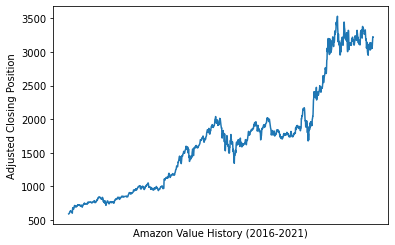

In [3]:
sns.lineplot(x = "Date", y = "Adj Close", data=amzn).set(xticks=[], xlabel="Amazon Value History (2016-2021)", ylabel="Adjusted Closing Position");
plt.show()

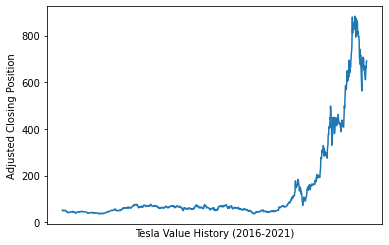

In [4]:
sns.lineplot(x = "Date", y = "Adj Close", data=tsla).set(xticks=[], xlabel="Tesla Value History (2016-2021)", ylabel="Adjusted Closing Position");
plt.show()

## Determining Historical Volatility

#### Visualizing Percental Change
The stocks in their raw visualization are incomparable, as they have a large difference of value range: AMZN's recent value is located between 3000-4000 US Dollar, while TSLA is located between 600-800 US Dollar.

We therefore determine the daily percental change of the stock adjusted closing value between trading days to better assess and compare the stock growth.

In [5]:
amzn["Pct Change"] = amzn["Adj Close"].pct_change()
tsla["Pct Change"] = tsla["Adj Close"].pct_change()

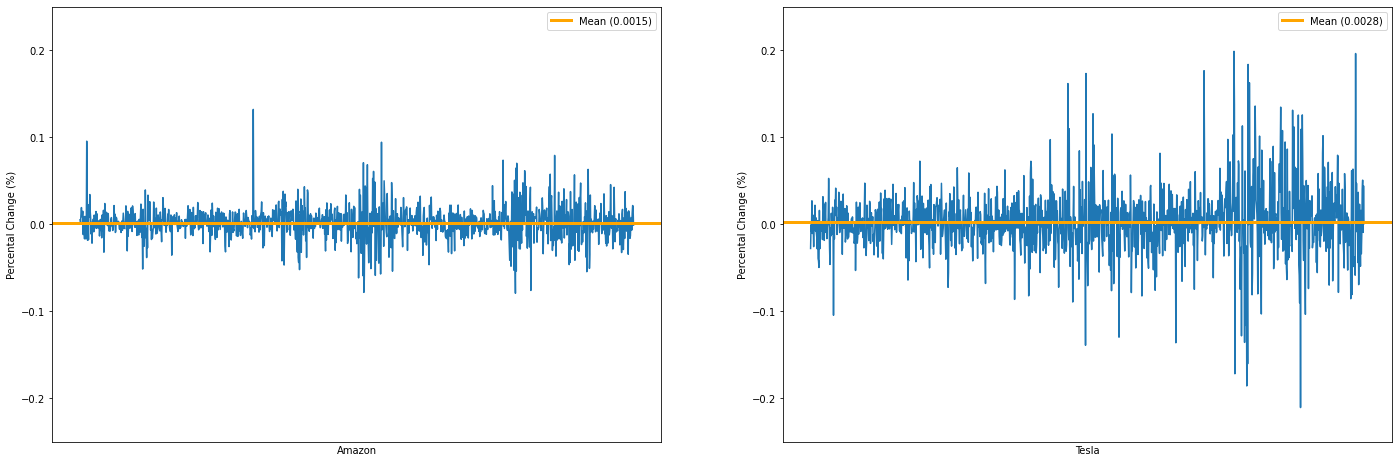

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(24,8))
sns.lineplot(x = "Date", y = "Pct Change", data=amzn, ax=ax[0])
sns.lineplot(x = "Date", y = "Pct Change", data=tsla, ax=ax[1])

# describe axes
ax[0].set(xticks=[], xlabel="Amazon", ylabel="Percental Change (%)")
ax[1].set(xticks=[], xlabel="Tesla", ylabel="Percental Change (%)")

# define same y-limits (max-range: 50% change in one day -> statistically very unlikely to exceed)
ax[0].set_ylim(-0.25,0.25)
ax[1].set_ylim(-0.25,0.25)

# display mean as horizontal line
ax[0].axhline(y=amzn["Pct Change"].mean(), linewidth=3.0, color="orange", label="Mean (" + str(amzn["Pct Change"].mean().round(4)) + ")")
ax[1].axhline(y=tsla["Pct Change"].mean(), linewidth=3.0, color="orange", label="Mean (" + str(tsla["Pct Change"].mean().round(4)) + ")")

# add legend
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

plt.show()

We derive a significantly higher historical volatility for the Tesla stock in comparison to the Amazon stock. This is relevant for our determination of risk as a high spread of value over time for a stock can be a leading factor to rapid loss (but also: rapid gain).

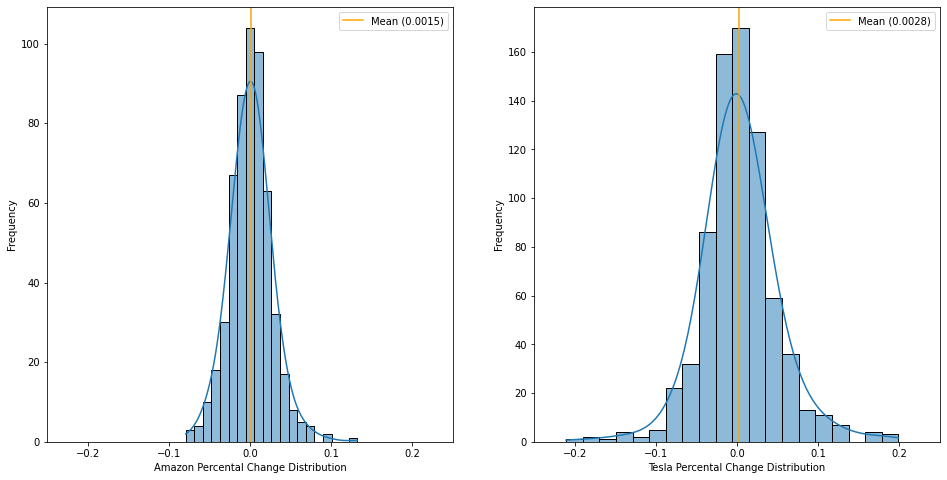

In [7]:
rounded_amzn_changes = amzn["Pct Change"].round(4).value_counts()
rounded_tsla_changes = tsla["Pct Change"].round(4).value_counts()

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.histplot(x=rounded_amzn_changes.index, bins=20, ax=ax[0], kde=True, kde_kws=dict(bw_method=.5))
sns.histplot(x=rounded_tsla_changes.index, bins=20, ax=ax[1], kde=True, kde_kws=dict(bw_method=.5))

# describe axes
ax[0].set(xlabel="Amazon Percental Change Distribution", ylabel="Frequency")
ax[1].set(xlabel="Tesla Percental Change Distribution", ylabel="Frequency")

# set mean vertical line
ax[0].axvline(x=amzn["Pct Change"].mean(), color="orange", label="Mean (" + str(amzn["Pct Change"].mean().round(4)) + ")")
ax[1].axvline(x=tsla["Pct Change"].mean(), color="orange", label="Mean (" + str(tsla["Pct Change"].mean().round(4)) + ")")

ax[0].set_xlim([-0.25,0.25])
ax[1].set_xlim([-0.25,0.25])

ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

plt.show()

In the distribution of percental change of both stocks, the Tesla stock has a wider spread, i.e. the variance of the daily change over time was higher. Visualized as a histogram, the previously graphed volatility (see lineplot above) is neatly displayed here to be in relation to the variance or standard deviation of the historical values. The standard deviation is therefore a commonly used factor of [Volatility determination](https://www.investopedia.com/terms/v/volatility.asp).

The percental change distributions of both stocks indicate a fairly normal distribution with a mean going towards 0.0. 
What can we further derive from this visualization? There are promising first impressions to be made: First, the mean is tilted towards the positive of the zero-center, indicating a small but general historical growth of the stock. Furthermore, Amazon's distribution indicates an asymmetrical set of outliers at the extremes, displaying a small but desirable longer tail into the positives. An investor can benefit from this. A sudden strong positive growth seems more probable than a sudden strong regression, statistically speaking.

The graph displays a distribution over a span of five years. For the investigation of volatility, especially for a new and rising "hyped" stock as Tesla, this timespan is misleading. Looking at the lineplot for Tesla's historical value, the stock has experienced a huge spike in value in the recent 18 months. To make a more valuable risk analysis for an investment in April 2021, we need to re-run our efforts against data from the recent months.

## Recent Volatility
We will use a [ of the standard timeframe](https://www.investopedia.com/articles/investing-strategy/071616/implied-vs-historical-volatility-main-differences.asp) for our Volatility determination and look into the last 90 days. 

The targeted timespan spreads from Oct 08, 2021 - Apr 06, 2021.

In [8]:
amzn_recent = amzn[(amzn["Date"] > "2020-10-07") & (amzn["Date"] < "2021-04-07")]
tsla_recent = tsla[(tsla["Date"] > "2021-03-07") & (tsla["Date"] < "2021-04-07")]

#### Visualizing Recent Value History

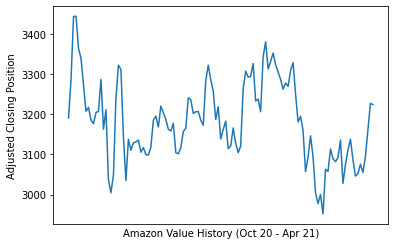

In [9]:
sns.lineplot(x = "Date", y = "Adj Close", data=amzn_recent).set(xticks=[], xlabel="Amazon Value History (Oct 20 - Apr 21)", ylabel="Adjusted Closing Position");
plt.show()

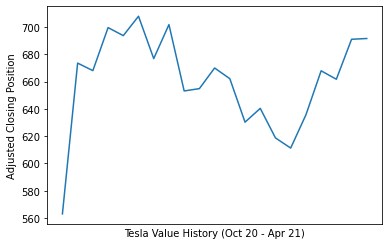

In [10]:
sns.lineplot(x = "Date", y = "Adj Close", data=tsla_recent).set(xticks=[], xlabel="Tesla Value History (Oct 20 - Apr 21)", ylabel="Adjusted Closing Position");
plt.show()

#### Visualizing Recent Percental Changes

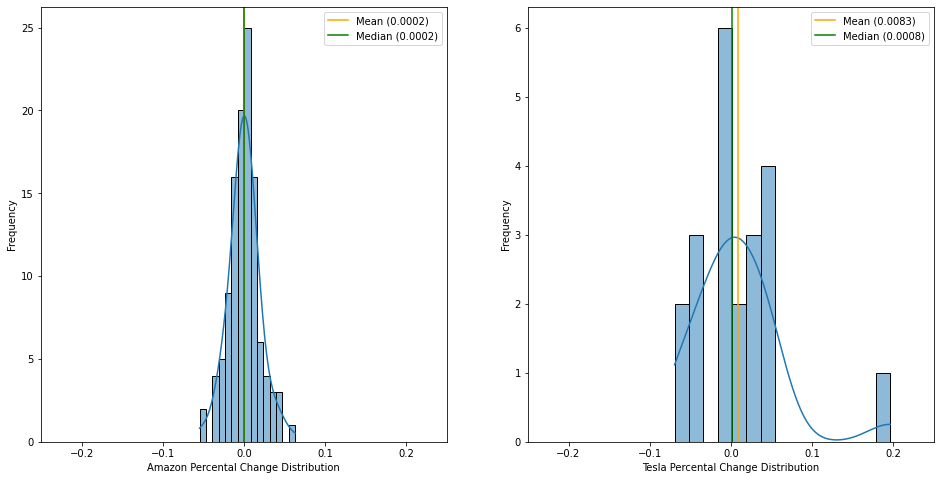

In [11]:
rounded_amzn_changes = amzn_recent["Pct Change"].round(4).value_counts()
rounded_tsla_changes = tsla_recent["Pct Change"].round(4).value_counts()

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.histplot(x=rounded_amzn_changes.index, bins=15, ax=ax[0], kde=True, kde_kws=dict(bw_method=.5))
sns.histplot(x=rounded_tsla_changes.index, bins=15, ax=ax[1], kde=True, kde_kws=dict(bw_method=.5))

# describe axes
ax[0].set(xlabel="Amazon Percental Change Distribution", ylabel="Frequency")
ax[1].set(xlabel="Tesla Percental Change Distribution", ylabel="Frequency")

# set mean vertical line
ax[0].axvline(x=amzn_recent["Pct Change"].mean(), color="orange", label="Mean (" + str(amzn_recent["Pct Change"].mean().round(4)) + ")")
ax[1].axvline(x=tsla_recent["Pct Change"].mean(), color="orange", label="Mean (" + str(tsla_recent["Pct Change"].mean().round(4)) + ")")

# set median vertical line
ax[0].axvline(x=amzn_recent["Pct Change"].median(), color="green", label="Median (" + str(amzn_recent["Pct Change"].median().round(4)) + ")")
ax[1].axvline(x=tsla_recent["Pct Change"].median(), color="green", label="Median (" + str(tsla_recent["Pct Change"].median().round(4)) + ")")

ax[0].set_xlim([-0.25,0.25])
ax[1].set_xlim([-0.25,0.25])

ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

plt.show()

We can deduct a similar distribution as in the historical distribution of the last 5-years with respect to the fairly normalized daily return of Amazon and Tesla's favorable positive skew. Amazon has become even 

In [12]:
def GKYZ(df, window=180):
    first = True
    results = pd.DataFrame({ "gkyz" : []})
    trading_days_in_year = 252
    for i, data in df.iterrows():
        previous_close = df.iloc[i:]["Open"] if(first == True) else df.iloc[i-1:]["Close"]
        print(df.iloc[:i]["Open"])
        print(previous_close)
        first = False
        #log_ocprev = np.log(df.iloc[i]["Open"] / previous_close)
        #log_hl = np.log(df.iloc[i]["High"] / df.iloc[i]["Low"])
        #log_co = np.log(df.iloc[i]["Close"] / df.iloc[i]["Close"])
        #rs = log_ocprev**2 + 0.5 * log_hl**2 - (2 * np.log(2) - 1) * log_co**2
        #results = rs
    
    return results.rolling(window=window).apply(lambda d: d.mean() * np.sqrt(trading_days_in_year)).dropna()

print(GKYZ(tsla_recent))

1237    600.549988
1238    608.179993
1239    700.299988
1240    699.400024
1241    670.000000
1242    694.090027
1243    703.349976
1244    656.869995
1245    684.289978
1246    646.599976
1247    684.590027
1248    675.770020
1249    667.909973
1250    613.000000
1251    641.869995
1252    615.640015
1253    601.750000
1254    646.619995
1255    688.369995
1256    707.710022
1257    690.299988
Name: Open, dtype: float64
Series([], Name: Open, dtype: float64)
1237    600.549988
1238    608.179993
1239    700.299988
1240    699.400024
1241    670.000000
1242    694.090027
1243    703.349976
1244    656.869995
1245    684.289978
1246    646.599976
1247    684.590027
1248    675.770020
1249    667.909973
1250    613.000000
1251    641.869995
1252    615.640015
1253    601.750000
1254    646.619995
1255    688.369995
1256    707.710022
1257    690.299988
Name: Open, dtype: float64
Series([], Name: Close, dtype: float64)
1237    600.549988
1238    608.179993
1239    700.299988
1240    699.